In [2]:
 # Importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# for displaying all feature from dataset:
pd.pandas.set_option('display.max_columns', None)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading Dataset:
dataset = pd.read_csv("/content/drive/MyDrive/PROJET 3/INFO MALADIE/DF/df_nettoyer/dfheartML.csv")
# Top 5 records:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

In [5]:
# Test sain
print(dataset[dataset['target']==0].head(1))

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   67    1   0       160   286    0        0      108      1      1.5   

     slope  ca  thal  target  
164      1   3     2       0  


In [7]:
# Test malade
print(dataset[dataset['target']==1].head(2))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   

   ca  thal  target  
0   0     1       1  
1   0     2       1  


In [ ]:
X = dataset[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca' , 'thal']]
y = dataset.iloc[:, -1]

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
# Independent and Dependent Feature:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.8 KB


In [ ]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [ ]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(226, 13)
(76, 13)


In [ ]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

***RANDOM FOREST***

In [ ]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8421052631578947
[[26  7]
 [ 5 38]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        33
           1       0.84      0.88      0.86        43

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [ ]:
train_score_rfcr = RandomForest.score(X_train, y_train)
test_score_rfcr = RandomForest.score(X_test, y_test)

print(f"- Le score pour le jeu d'entrainement est : {train_score_rfcr*100:.2f}%")
print(f"- Le score pour le jeu de test est : {test_score_rfcr*100:.2f}%")


- Le score pour le jeu d'entrainement est : 100.00%
- Le score pour le jeu de test est : 84.21%


In [ ]:
predict_train_data_rfcr = RandomForest.predict(X_test)
cm_rfcr = confusion_matrix(y_test, predict_train_data_rfcr)
df_confusion_rfcr = pd.DataFrame(cm_rfcr, index=['Réel Sain', 'Réel Malade'], columns=['Prédit Sain', 'Prédit Malade'])
df_confusion_rfcr

,Prédit Sain,Prédit Malade
Réel Sain,26,7
Réel Malade,5,38


***GRADIENT BOOSTING CLASSIFIER***

In [ ]:
X_gbcr = dataset[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca' , 'thal']]
y_gbcr = dataset.iloc[:, -1]

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X_gbcr_train, X_gbcr_test, y_gbcr_train, y_gbcr_test = train_test_split(X_gbcr, y_gbcr, test_size = 0.30, random_state=10)
GradientBoost_model_gbcr = GradientBoostingClassifier()
GradientBoost_model_gbcr.fit(X_gbcr_train, y_gbcr_train)

GradientBoostingClassifier()

In [ ]:
train_score_gbcr = GradientBoost_model_gbcr.score(X_gbcr_train, y_gbcr_train)
test_score_gbcr = GradientBoost_model_gbcr.score(X_gbcr_test, y_gbcr_test)
print(f"- Le score pour le jeu d'entrainement est : {train_score_gbcr*100:.2f}%")
print(f"- Le score pour le jeu de test est : {test_score_gbcr*100:.2f}%")

- Le score pour le jeu d'entrainement est : 99.53%
- Le score pour le jeu de test est : 76.92%


***GRADIENT BOOSTING CLASSIFIER AVEC STANDARD SCALER***

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_gbcr_train, X_gbcr_test, y_gbcr_train, y_gbcr_test = train_test_split(X_gbcr, y_gbcr, test_size = 0.30, random_state=0)

In [ ]:
scaler_gb = StandardScaler()
X_gbcr_train_scaled = scaler_gb.fit_transform(X_gbcr_train)

In [ ]:
X_gbcr_test_scaled = scaler_gb.transform(X_gbcr_test)

In [ ]:
GradientBoost_model_gbcr2 = GradientBoostingClassifier()
GradientBoost_model_gbcr2.fit(X_gbcr_train_scaled, y_gbcr_train)

GradientBoostingClassifier()

In [ ]:
predict_train_data_gbcr = GradientBoost_model_gbcr2.predict(X_gbcr_test_scaled)
print(predict_train_data_gbcr)

[0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1
 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0
 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0]


In [ ]:
report_gbcr = classification_report(y_gbcr_test, predict_train_data_gbcr, output_dict = True)
df_report_gbcr = pd.DataFrame(report_gbcr).transpose()
df_report_gbcr

,precision,recall,f1-score,support
0,0.833333,0.777778,0.804598,45.000000
1,0.795918,0.847826,0.821053,46.000000
accuracy,0.813187,0.813187,0.813187,0.813187
macro avg,0.814626,0.812802,0.812825,91.000000
weighted avg,0.814420,0.813187,0.812916,91.000000


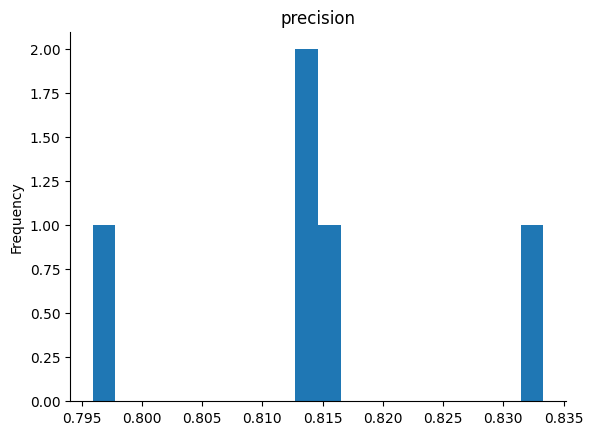

In [ ]:
# @title precision

from matplotlib import pyplot as plt
df_report_gbcr['precision'].plot(kind='hist', bins=20, title='precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
train_score_gbcr = GradientBoost_model_gbcr.score(X_gbcr_train, y_gbcr_train)
test_score_gbcr = GradientBoost_model_gbcr.score(X_gbcr_test, y_gbcr_test)
print(f"- Le score pour le jeu d'entrainement est : {train_score_gbcr*100:.2f}%")
print(f"- Le score pour le jeu de test est : {test_score_gbcr*100:.2f}%")

- Le score pour le jeu d'entrainement est : 100.00%
- Le score pour le jeu de test est : 80.22%


NB : pas de différence avec le scaler.

***LOGISTIC REGRESSION AVEC STANDARD SCALER***

In [ ]:
X_lrcr = dataset[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca' , 'thal']]
y_lrcr = dataset.iloc[:, -1]

In [ ]:
X_lrcr_train, X_lrcr_test, y_lrcr_train, y_lrcr_test = train_test_split(X_lrcr, y_lrcr, test_size = 0.25, random_state=42)

In [ ]:
scaler_lr = StandardScaler()
X_lrcr_train_scaled = scaler_lr.fit_transform(X_lrcr_train)

In [ ]:
X_lrcr_test_scaled = scaler_lr.transform(X_lrcr_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticregression_model_lrcr = LogisticRegression()
logisticregression_model_lrcr.fit(X_lrcr_train_scaled, y_lrcr_train)

LogisticRegression()

In [ ]:
predict_train_data_lrcr = logisticregression_model_lrcr.predict(X_lrcr_test_scaled)
print(predict_train_data_lrcr)

[0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1
 0 1]


In [ ]:
report_lrcr = classification_report(y_lrcr_test, predict_train_data_lrcr, output_dict = True)
df_report_lrcr = pd.DataFrame(report_lrcr).transpose()
df_report_lrcr

,precision,recall,f1-score,support
0,0.828571,0.828571,0.828571,35.000000
1,0.853659,0.853659,0.853659,41.000000
accuracy,0.842105,0.842105,0.842105,0.842105
macro avg,0.841115,0.841115,0.841115,76.000000
weighted avg,0.842105,0.842105,0.842105,76.000000


In [ ]:
train_score_lrcr = logisticregression_model_lrcr.score(X_lrcr_train_scaled, y_lrcr_train)
test_score_lrcr = logisticregression_model_lrcr.score(X_lrcr_test_scaled, y_lrcr_test)
print(f"- Le score pour le jeu d'entrainement est : {train_score_lrcr*100:.2f}%")
print(f"- Le score pour le jeu de test est : {test_score_lrcr*100:.2f}%")

- Le score pour le jeu d'entrainement est : 85.84%
- Le score pour le jeu de test est : 84.21%
